In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)    # reproducible, random seed

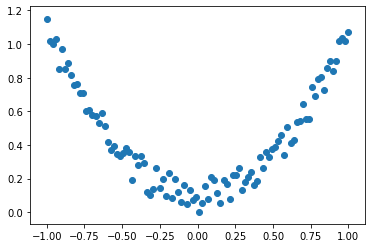

In [3]:
# make some fake data and display them
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
# y: x*x add a random noise
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [4]:
# define the net work
class Net(torch.nn.Module):
    # do initialization in function __init__, e.g. define net layers used repeatedly in the net work(although not repeated in this simple example)
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [5]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # instantiate the network
print(net)  # print the net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # initialize the optimizer, SGD ==> 梯度下降
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss, 均方误差

In [7]:
plt.ion()   # something about plotting

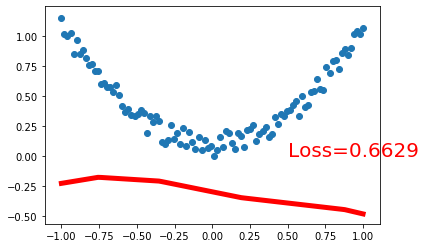

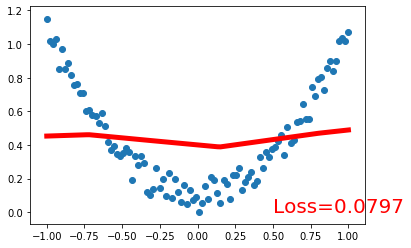

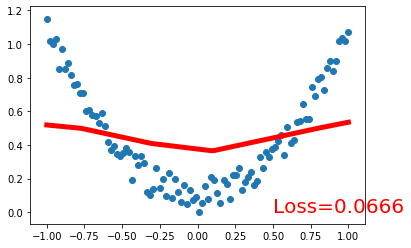

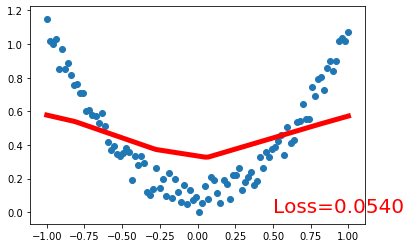

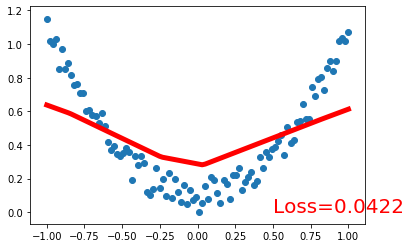

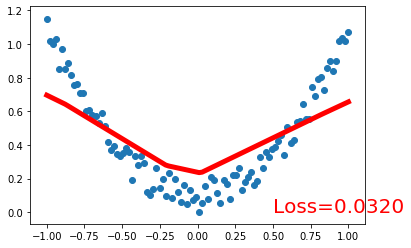

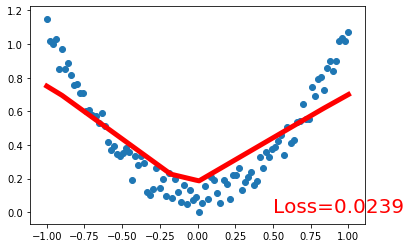

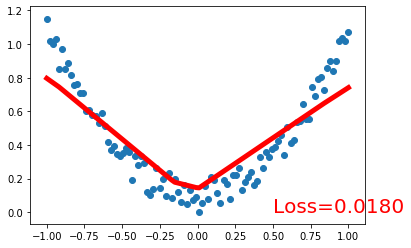

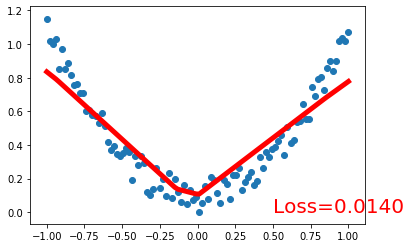

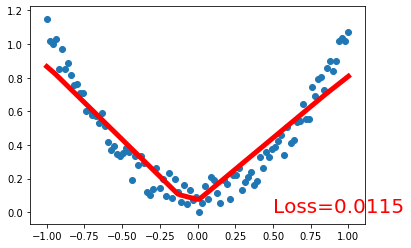

In [8]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # must clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients to renew your params

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()